In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cross_validation import train_test_split
from NNK2 import NNK

/home/boris/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
X = np.array([[0,0,1],
            [0,1,1],
            [1,0,1],
            [1,1,1]])
                
y = np.array([[0],
			[1],
			[1],
			[0]])

In [3]:
NN = NNK(layers = [3,4,1],seed=None,verbose=False)
NN.train(X,y,cycle=6000)
NN.predict(X)

array([[0.01154655],
       [0.98812192],
       [0.98828736],
       [0.01332489]])

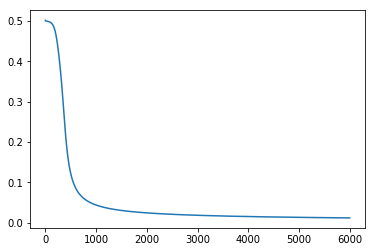

In [4]:
plt.plot(range(len(NN.lerror)),NN.lerror)

In [5]:
X = np.array([[0,0,0,1,0,
               0,0,1,1,0,
               0,1,0,1,0,
               0,0,0,1,0,
               0,0,1,1,1],
              [0,0,1,1,0,
               0,1,0,0,1,
               0,0,0,1,0,
               0,0,1,0,0,
               0,1,1,1,1],
              [0,1,1,1,1,
               0,0,0,1,0,
               0,0,1,1,0,
               0,0,0,0,1,
               0,1,1,1,0],
              [0,0,0,1,0,
               0,0,1,1,0,
               0,1,0,1,0,
               1,1,1,1,1,
               0,0,0,1,0],
              [1,1,1,1,1,
               1,0,0,0,0,
               1,1,1,1,0,
               0,0,0,0,1,
               1,1,1,1,0],
              [0,0,1,1,0,
               0,1,0,0,0,
               1,1,1,1,0,
               1,0,0,0,1,
               0,1,1,1,0],
              [1,1,1,1,1,
               0,0,0,1,0,
               0,1,1,1,0,
               0,1,0,0,0,
               1,0,0,0,0]
             ])
                
y = np.array([[1],
			[2],
			[3],
            [4],
            [5],
            [6],
            [7]])

NN = NNK(layers = [25,4,1],seed=None,verbose=False)
NN.train(X,y/10,cycle=6000)
NN.predict(X)*10

array([[1.],
       [2.],
       [3.],
       [4.],
       [5.],
       [6.],
       [7.]])

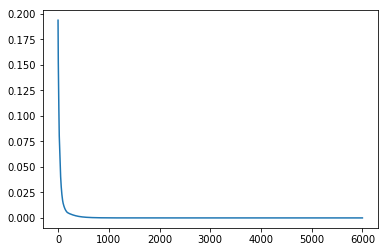

In [6]:
plt.plot(range(len(NN.lerror)),NN.lerror)

In [7]:
X = np.array([[0.1],
              [0.2],
              [0.3],
              [0.4]
             ])
                
y = np.array([[0.2],
			[0.4],
			[0.6],
            [0.8]])

NN = NNK(layers = [1,20,4,1],seed=None,verbose=False)
NN.train(X,y,cycle=600000)
NN.predict(X)

array([[0.2],
       [0.4],
       [0.6],
       [0.8]])

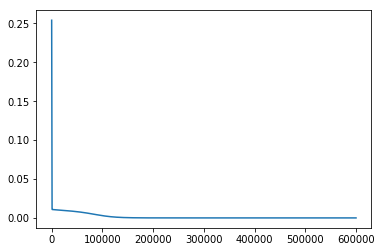

In [8]:
plt.plot(range(len(NN.lerror)),NN.lerror)

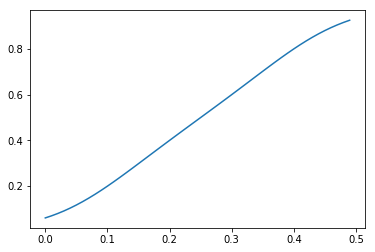

In [9]:
plt.plot(np.arange(0.,0.5,0.01).reshape(50,1),NN.predict(np.arange(0,0.5,0.01).reshape(50,1)))

In [2]:
cols=['dateTime','Ouverture','Chamb_Temp','Lyon_Temp']
parse_dates = ['dateTime']
#raw_data = pd.read_csv('temperatures2.csv', skiprows=[0],names=cols,decimal=",",sep=";", parse_dates=parse_dates)
raw_data = pd.read_csv('compiled.csv',usecols=range(1,6))
raw_data.head()

,dateTime,Ouverture,Chamb_Temp,Lyon_Temp,Temp_1H
0,0,0.0,19.200,0.550,0.000
1,3600,0.0,19.200,0.250,0.025
2,7200,0.0,19.225,0.025,0.075
3,10800,0.0,19.300,-0.225,0.000
4,14400,0.0,19.300,-0.400,0.000


In [3]:
data = raw_data[raw_data['Temp_1H']<1.]
X = data.values[:,range(4)]
y = data.values[:,4]
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,train_size=0.8)
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((1555, 4), (389, 4), (1555,), (389,))

In [4]:
def xMinMax(X):
    return np.min(X,axis=0),np.max(X-np.min(X,axis=0),axis=0)
def scale(X,Xmin,Xmax):
    return np.dot(X-Xmin,np.diag(1/Xmax))
def unscale(X,Xmin,Xmax):
    return np.dot(X,np.diag(Xmax))+Xmin

In [5]:
Xmin,Xmax = xMinMax(Xtrain)
ymin,ymax = xMinMax(ytrain.reshape((ytrain.shape[0],1)))

In [22]:
X = scale(Xtrain,Xmin,Xmax)
#X = Xtrain
y = scale(ytrain.reshape((ytrain.shape[0],1)),ymin,ymax)
NN = NNK(layers = [4,4,1],eta=0.00005,seed=None,factiv='identite',verbose=False)
NN.train(X,y,Xtest=scale(Xtest,Xmin,Xmax),ytest=scale(ytest.reshape(ytest.shape[0],1),ymin,ymax),cycle=1000000)
#NN.predict(scale(Xtest,Xmin,Xmax))
plt.plot(range(len(NN.lerror)),NN.lerror,NN.lerrorTest)
NN.predict(X),ytrain

KeyboardInterrupt: 

In [ ]:
plt.rcParams["figure.figsize"] = [18,6]
plt.plot(np.arange(ytest.shape[0])[0:100],ytest[0:100],unscale(NN.predict(scale(Xtest,Xmin,Xmax)),ymin,ymax)[0:100])

In [ ]:
plt.rcParams["figure.figsize"] = [18,6]
plt.plot(np.arange(ytrain.shape[0])[0:100],ytrain[0:100],unscale(NN.predict(scale(Xtrain,Xmin,Xmax)),ymin,ymax)[0:100])

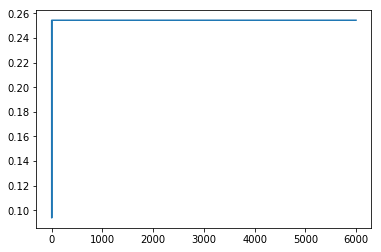

In [17]:
plt.plot(range(len(NN.lerror)),NN.lerror)

In [18]:
scale(Xtrain,Xmin,Xmax)

array([[0.22983871, 0.05513784],
       [0.80846774, 0.39849624],
       [0.40322581, 0.55388471],
       ...,
       [0.57056452, 0.8320802 ],
       [0.44354839, 0.33333333],
       [0.79032258, 0.18295739]])

In [27]:
NN.predict(Xtrain),ytrain

(array([[0.75070721],
        [0.75831446],
        [0.75695372],
        ...,
        [0.76088126],
        [0.75505163],
        [0.75605109]]),
 array([-0.1  , -0.075,  0.   , ...,  0.075, -0.1  , -0.075]))

In [20]:
np.mean(y)

0.745551982851018